# Predicting the Sale Price of cars using Machine Learning 🚗 💵

We are going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Modelling using Deep Neural Network 

## Problem Defition

> How well can we predict the future sale price of a car, given its characteristics and previous examples of how much similar car have been sold for using Dubizzle Platform?

Since we're trying to predict a number, this kind of problem is known as a **regression problem**.

## Data 

The sample dataset is taken from the [Kaggle](https://www.kaggle.com/datasets/alihassankp/dubizzle-used-car-sale-data). The dataset has 20 columns. It has 19  features to be used predicting the label which is price_in_aed column in the dataset. You can see the data dictionary [here](Data/README.md).

## Evaluation

> If we can reach less than XXXXXX at predicting 

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
⚠️ Note: Due to the nature of experimentation, the evaluation metric may change over time.
</div>

## Import Libraries

We're going to use:
- [pandas](https://pandas.pydata.org/) for data analysis.
- [NumPy](https://numpy.org/) for numerical operations.
- [Matplotlib](https://matplotlib.org/) / [seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
- [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set(style="ticks")

# Preprocessing the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

# Linear Models from Scikit-Learn
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Non-linear Models from Scikit-Learn
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Ensemble Models from Scikit-Learn
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluation
from sklearn.metrics import r2_score

## Load Data

In [3]:
raw_data = pd.read_csv('Data/data.csv')
raw_data.shape # rows and columns

(9970, 20)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   object 
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9911 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

## 📈 Data Exploration (Exploratory Data Analysis - EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

To answer the above questions, we'll perform univariate, bivariate and multivariate analysis.

In [5]:
# Keeping the original dataset aside just in case
df = raw_data.copy()
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


In [6]:
df.tail()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
9965,AED7525month | 2015 Land Rover Range Rover Aut...,"215,000",105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021
9966,LOW MILEAGE Cadillac Escalade Platinum,"90,000",55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade,11/05/2022
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,"679,000",100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Left Hand Side,NaN,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021
9968,Chevrolet Malibu GCC Spec,"18,900",140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu,06/03/2022
9969,LOW MILEAGE! PERFECT CONDITION! Jeep Wrangler ...,"77,700",86000,Perfect inside and out,Perfect inside and out,Dealer,Crossover,6,Manual Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2013.0,Orange,Dubai,Sahara,jeep,wrangler,04/12/2021


<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> 
    <ul>
        <li><code>title</code> column is not relevant, so it should be removed.</li>
        <li>The data type of <code>price_in_aed</code> is <code>object</code>, it should be converted into <code>int</code>.</li>
        <li>The same applies for <code>no_of_cylinders</code>.</li>
        <li><code>year</code> should be <code>int</code> not <code>float64</code>.</li>
        <li>I would keep <code>date_posted</code> if we were predicting how much time it would take to sell car or if we had the sold-price after negotiation, but it's a problem for some other time.</li>
    </ul>
</div>

In [7]:
df.drop(['title', 'date_posted'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_in_aed          9970 non-null   object 
 1   kilometers            9970 non-null   int64  
 2   body_condition        9970 non-null   object 
 3   mechanical_condition  9970 non-null   object 
 4   seller_type           9970 non-null   object 
 5   body_type             9970 non-null   object 
 6   no_of_cylinders       9911 non-null   object 
 7   transmission_type     9970 non-null   object 
 8   regional_specs        9970 non-null   object 
 9   horsepower            9970 non-null   object 
 10  fuel_type             9970 non-null   object 
 11  steering_side         9970 non-null   object 
 12  year                  9000 non-null   float64
 13  color                 9970 non-null   object 
 14  emirate               9970 non-null   object 
 15  motors_trim          

In [8]:
# Turn price_in_aed into int
df['price_in_aed'] = df['price_in_aed'].str.replace(',', '').astype(int)

In [9]:
df.describe()

,price_in_aed,kilometers,year
count,9.970000e+03,9.970000e+03,9000.000000
mean,2.480496e+05,9.894896e+04,2015.626444
std,4.536549e+05,1.154300e+06,4.735991
min,6.000000e+03,0.000000e+00,1953.000000
25%,5.100000e+04,2.314350e+04,2014.000000
50%,1.040000e+05,7.600000e+04,2016.000000
75%,2.340000e+05,1.330828e+05,2019.000000
max,1.499900e+07,1.150000e+08,2021.000000


In [10]:
def list_feature_types(dataframe):
    '''
        This function returns 2 lists for categorical features and numeric features.
        
        Parameters
        ----------
        dataframe: tabular data in data frame format.
        
        Returns
        ----------
        cat_features: a list of column names in the data frame with categorical values
        nbr_features: a list of column names in the data frame with numeric values
        
        
    '''
    
    cat_features = []
    nbr_features = []

    for feature in dataframe.drop('price_in_aed', axis=1).columns:
        if dataframe[feature].dtype == 'O':
            cat_features.append(feature)
        else:
            nbr_features.append(feature)

    print('Categorical Features (', len(cat_features), '): ', cat_features, '\n', sep='')
    print('Numeric Features (',len(nbr_features),'):', nbr_features, sep='')
    
    return cat_features, nbr_features

In [11]:
# Create a list of the columns 
cat_features, nbr_features = list_feature_types(df)

Categorical Features (15): ['body_condition', 'mechanical_condition', 'seller_type', 'body_type', 'no_of_cylinders', 'transmission_type', 'regional_specs', 'horsepower', 'fuel_type', 'steering_side', 'color', 'emirate', 'motors_trim', 'company', 'model']

Numeric Features (2):['kilometers', 'year']


### Categorical Features

In [12]:
# Let's see how many categories each feature has
for feature in cat_features:
    print("\033[1m" + feature + "\033[0m") # to print in bold
    print(df[feature].value_counts(normalize=True))
    print('\n------------------------\n')
    

body_condition
Perfect inside and out                0.964092
No accidents, very few faults         0.020863
A bit of wear & tear, all repaired    0.011936
Normal wear & tear, a few issues      0.003109
Name: body_condition, dtype: float64

------------------------

mechanical_condition
Perfect inside and out              0.985155
Minor faults, all fixed             0.013641
Major faults fixed, small remain    0.000802
Ongoing minor & major faults        0.000301
Major faults, all fixed             0.000100
Name: mechanical_condition, dtype: float64

------------------------

seller_type
Dealer                            0.678235
Owner                             0.294684
Dealership/Certified Pre-Owned    0.027081
Name: seller_type, dtype: float64

------------------------

body_type
SUV                     0.457974
Sedan                   0.275627
Coupe                   0.085356
Pick Up Truck           0.042929
Hatchback               0.034504
Sports Car              0.026078
Hard To

In [13]:
def count_plot(dataframe, cat_feature_lits):
    '''
        This function plots the number of values 
        for each category in each categorical feature.
        
        Parameters
        ----------
        dataframe: tabular data in data frame format.
        cat_features: a list of column names in the data frame with categorical values
        
        Returns
        ----------
        
        
    '''
    n_cols = 2 # set the number of columns
    n_rows = round(len(cat_feature_lits)/n_cols) # set the number of rows with the predefined number of columns
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20)) # width, height of the figure
    
    for i, feature in enumerate(cat_feature_lits):
        row_idx = i // n_cols
        col_idx = i % n_cols
        sb.countplot(data=dataframe, x=feature, ax=axes[row_idx, col_idx])
    
    plt.tight_layout()
    img_path = 'Images/Categorical_Features.png'
    plt.savefig(img_path) # Save the plot for future use
    plt.show()

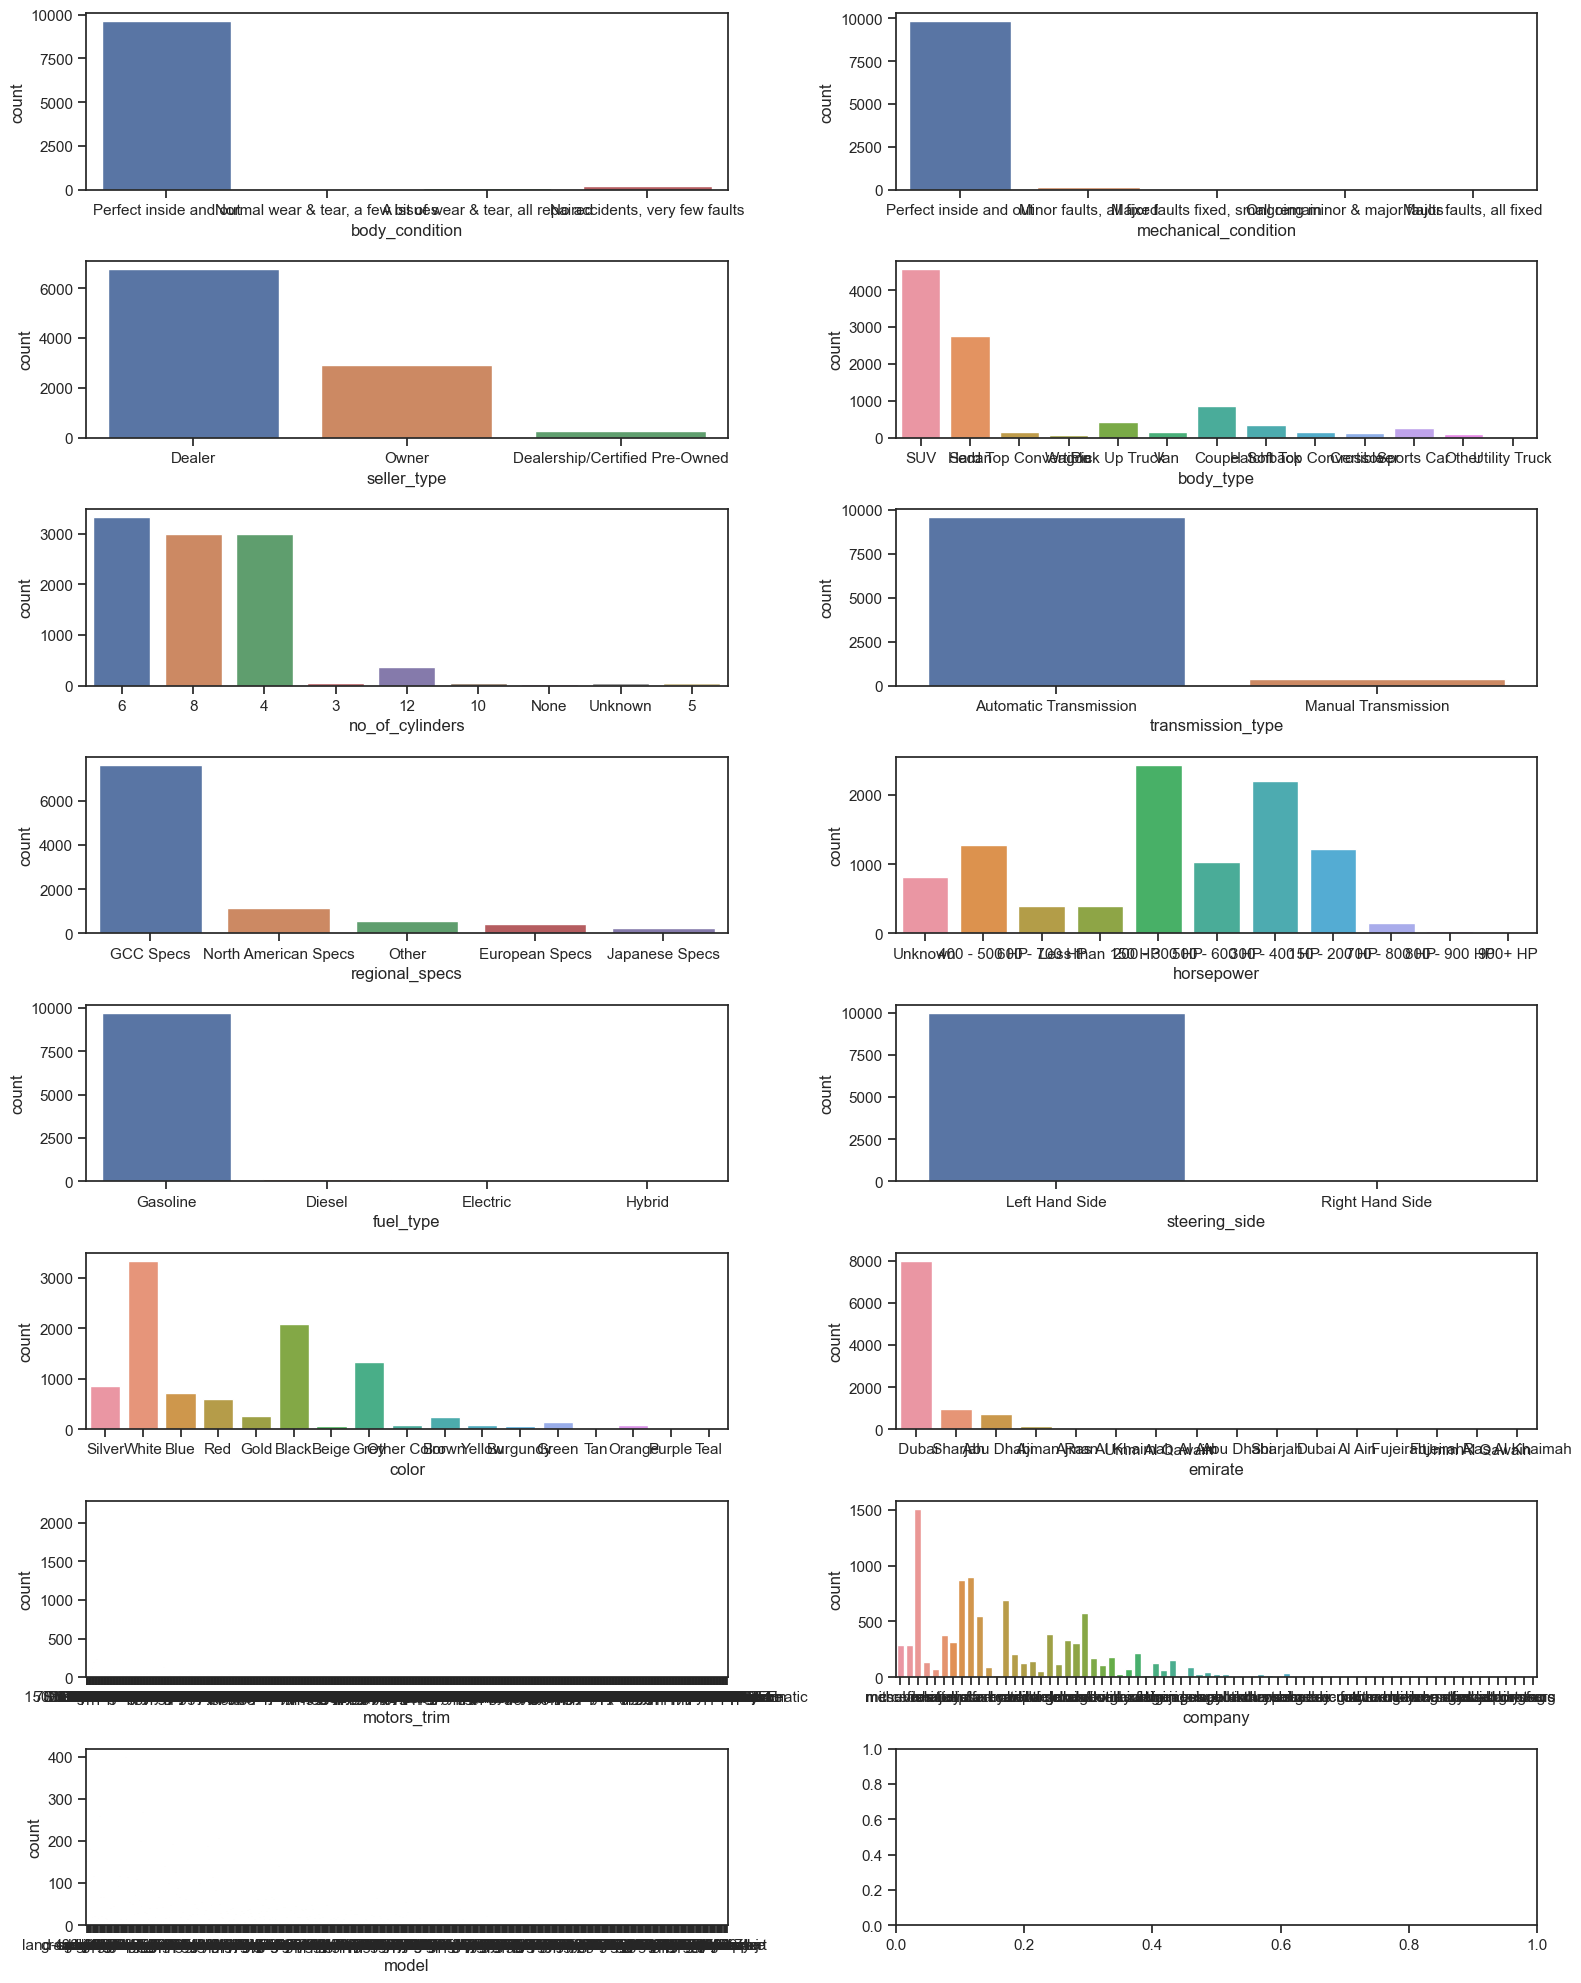

In [14]:
count_plot(df, cat_features)

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b><a id='cat_eda_obs'></a>
    <ol>
        <li><code>no_of_cylinders</code> column has both Unknown and NULL values which both of them should be dropped.</li>
        <li><code>horsepower</code> has Unknown values which can be dropped or can be filled by checking the specs of the <code>company</code>, <code>model</code> and <code>motors_trim</code>from the internet. Since we have enough data points, it's I'll prefer the easier way and remove them.</li>
        <li><code>emirate</code> column has spaces at the beginning and the end of it's values which should be removed.</li>
        <li><code>motors_trim</code> column has 856 different values which is too much for any kind of encoding.</li>
        <li><code>company</code> column has 73 different values which is too much for any kind of encoding.</li>
        <li><code>model</code> column has 552 different values which is too much for any kind of encoding.</li>
        <li><code>transmission_type</code>, <code>fuel_type</code> and <code>steering_side</code> features imbalanced so the minor classes should be removed, then the columns should be dropped.</li>
        <li>All other specs apart from 'GCC Specs' can be assigned as 'Other' in <code>regional_specs</code> column.</li>
    </ol>
</div>

### Numeric Features

In [15]:
def dist_plot(dataframe, feature):
    '''
        This function takes the name of the feature and 
        plots the distribution of the numeric values
        both using boxplot and hisplot of seaborn. 
        The purpose is to check if the numeric feature has 
        normal distribution and detect outliers manualy.
        
        Parameters
        ----------
        dataframe: tabular data in data frame format.
        feature: string 
            numeric feature (column) in the data frame. 
        
    '''
    print(f"Skewness: {dataframe[feature].skew()}") # Print the skewness and check if it's positive or negative skewed
    print(f"Kurtosis: {dataframe[feature].kurt()}")
    print('------------------------------------------')
    
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(0.15, 0.85)})
    
    sb.boxplot(data=dataframe, x=feature, color='lightblue', ax=ax_box)
    ax_box.set_title(feature.replace('_', ' ').capitalize(), fontsize=16)
    ax_box.set_xlabel('')
    
    sb.histplot(data=dataframe, x=feature, kde=True, ax=ax_hist)
    
    plt.tight_layout()
    img_path = 'Images/' + feature + '_dist.png'
    plt.savefig(img_path) # Save the plot for future use
    plt.show()

Skewness: 7.3522102789852815
Kurtosis: 140.41266824746788
------------------------------------------


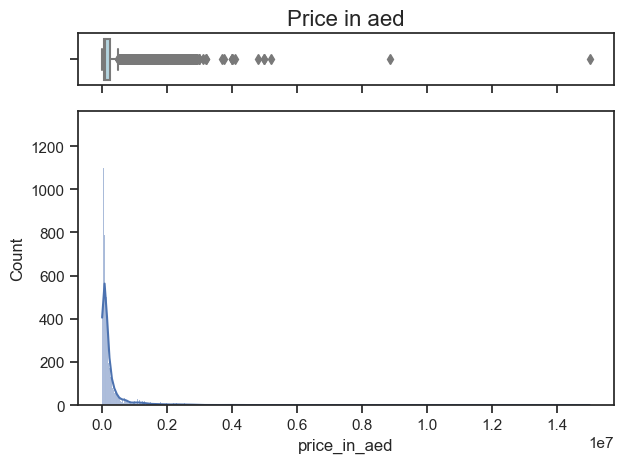

In [16]:
dist_plot(df, 'price_in_aed')

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> The label has many outliers and the data is positively skewed. We'll not accept anything more than 2,000,000 AED.
</div>

Skewness: 98.96171978514133
Kurtosis: 9851.438735481617
------------------------------------------


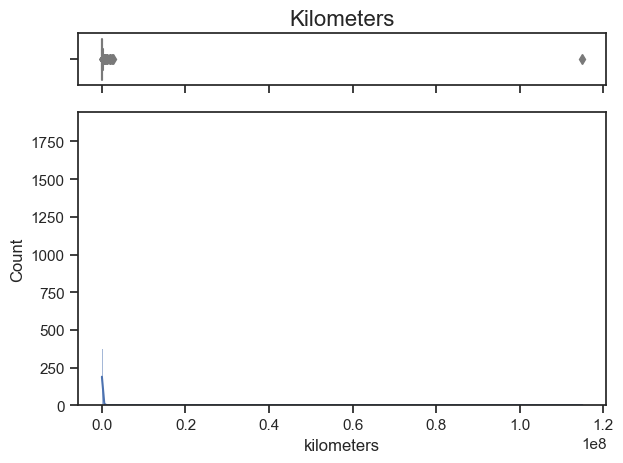

In [17]:
dist_plot(df, 'kilometers')

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> It's really hard to interpret any information out of this plot. It's mostly because of the outlier (max value) showed in the boxplot. We'll remove it and re-plot the data to have more information on it. It looks like a human error.
</div>

Skewness: 7.963300972562847
Kurtosis: 177.55210904209315
------------------------------------------


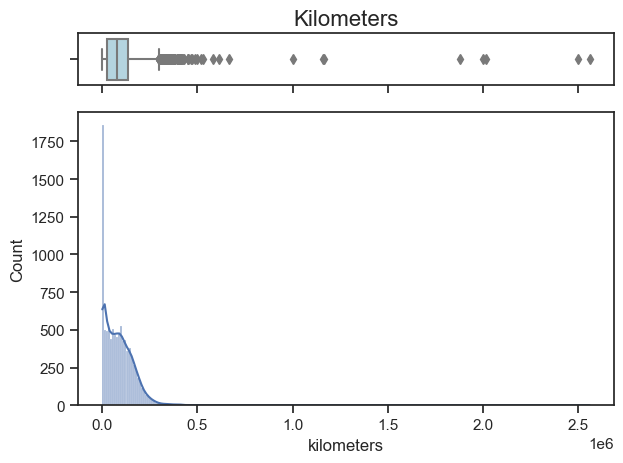

In [18]:
# Removing the max value in kilometers feature to have more meaningful plot
dist_plot(df[df['kilometers'] != 115000000], 'kilometers')

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> This feature is also positively skewed. The max value we should accept in the model should be 500,000 KM.
</div>

Skewness: -3.2943962965473683
Kurtosis: 26.16499922900296
------------------------------------------


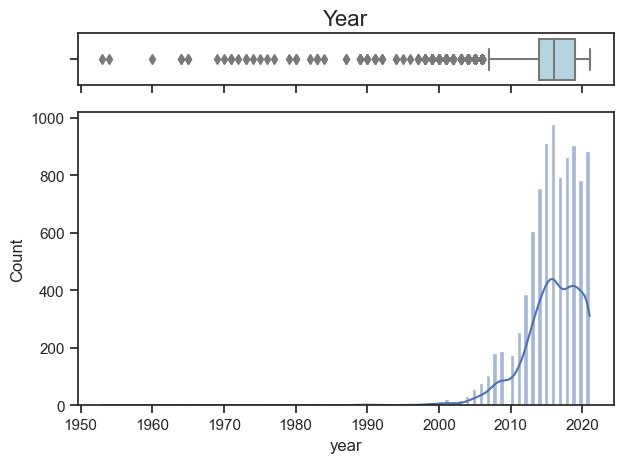

In [18]:
dist_plot(df, 'year')

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> This feature is negatively skewed. We'll filter it for the cars which are manufactured after 2000.
</div>

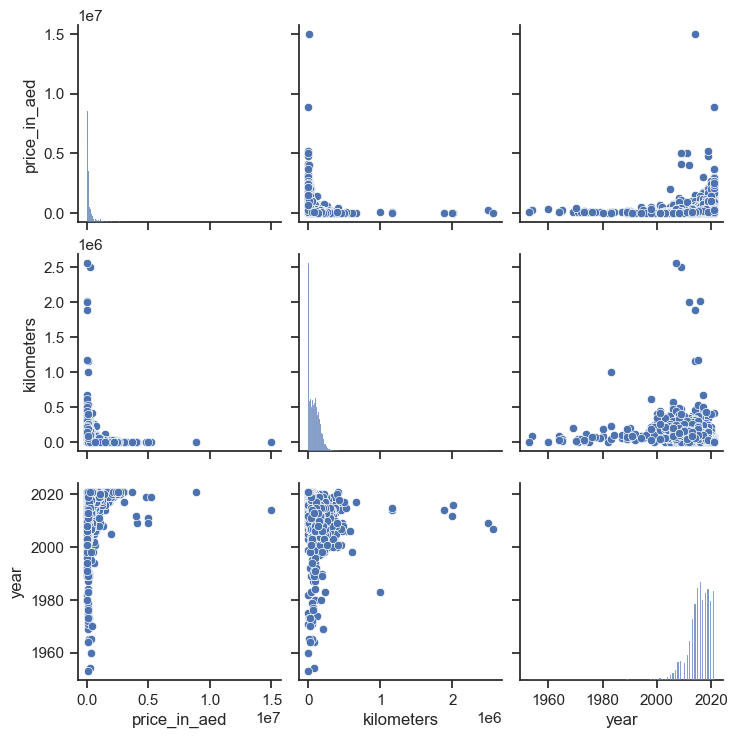

In [19]:
sb.pairplot(data=df[df['kilometers'] != 115000000])
plt.show()

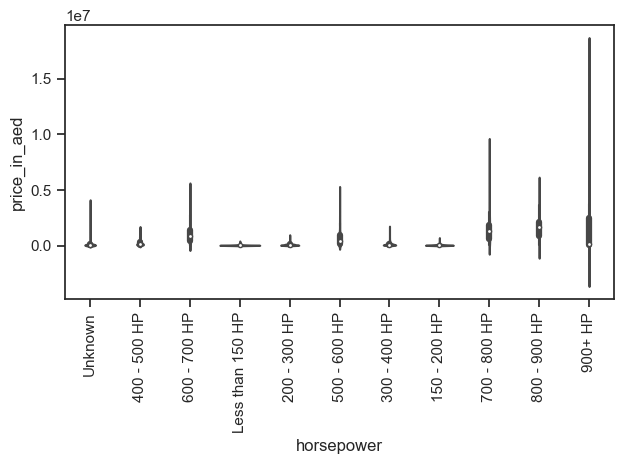

In [70]:
sb.violinplot(data=df[df['kilometers'] != 115000000], y='price_in_aed', x='horsepower')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Data Processing

Firts we'll perform the changes that we mentioned in the [observations](#cat_eda_obs) section of Categorical Feature EDA.

In [19]:
# Drop null values
df_no_null = df.dropna().reset_index(drop=True)
df_no_null.shape

(8967, 18)

In [20]:
# Drop duplicates
df_no_dup = df_no_null.drop_duplicates().reset_index(drop=True)
df_no_dup.shape

(8710, 18)

In [21]:
df_no_dup['emirate'] = df_no_dup['emirate'].str.strip()
df_no_dup['emirate'].value_counts(normalize=True)

Dubai             0.790241
Sharjah           0.107807
Abu Dhabi         0.078186
Ajman             0.016188
Al Ain            0.004018
Ras Al Khaimah    0.001952
Umm Al Qawain     0.000804
Fujeirah          0.000804
Name: emirate, dtype: float64

In [22]:
df_no_dup.loc[((df_no_dup['emirate'] == 'Ajman') | (df_no_dup['emirate'] == 'Al Ain') | 
               (df_no_dup['emirate'] == 'Ras Al Khaimah') | 
               (df_no_dup['emirate'] == 'Umm Al Qawain') | 
               (df_no_dup['emirate'] == 'Fujeirah')), 'emirate'] = 'Other'
df_no_dup['emirate'].value_counts()

Dubai        6883
Sharjah       939
Abu Dhabi     681
Other         207
Name: emirate, dtype: int64

In [23]:
df_no_dup = df_no_dup[df_no_dup['no_of_cylinders'] != 'Unknown']
df_no_dup.shape

(8666, 18)

In [24]:
df_no_dup = df_no_dup[df_no_dup['horsepower'] != 'Unknown']
df_no_dup.shape

(7974, 18)

In [25]:
df_no_dup = df_no_dup[df_no_dup['steering_side'] != 'Right Hand Side']
df_no_dup.drop('steering_side', axis=1, inplace=True)
df_no_dup.shape

(7972, 17)

In [26]:
df_no_dup = df_no_dup[df_no_dup['transmission_type'] == 'Automatic Transmission']
df_no_dup.drop('transmission_type', axis=1, inplace=True)
df_no_dup.shape

(7702, 16)

In [27]:
df_no_dup = df_no_dup[df_no_dup['fuel_type'] == 'Gasoline']
df_no_dup.drop('fuel_type', axis=1, inplace=True)
df_no_dup.shape

(7636, 15)

In [28]:
df_no_dup.loc[df_no_dup['regional_specs'] != 'GCC Specs', 'regional_specs'] = 'Other'
df_no_dup['regional_specs'].value_counts()

GCC Specs    5980
Other        1656
Name: regional_specs, dtype: int64

Categorical Features (12): ['body_condition', 'mechanical_condition', 'seller_type', 'body_type', 'no_of_cylinders', 'regional_specs', 'horsepower', 'color', 'emirate', 'motors_trim', 'company', 'model']

Numeric Features (2):['kilometers', 'year']


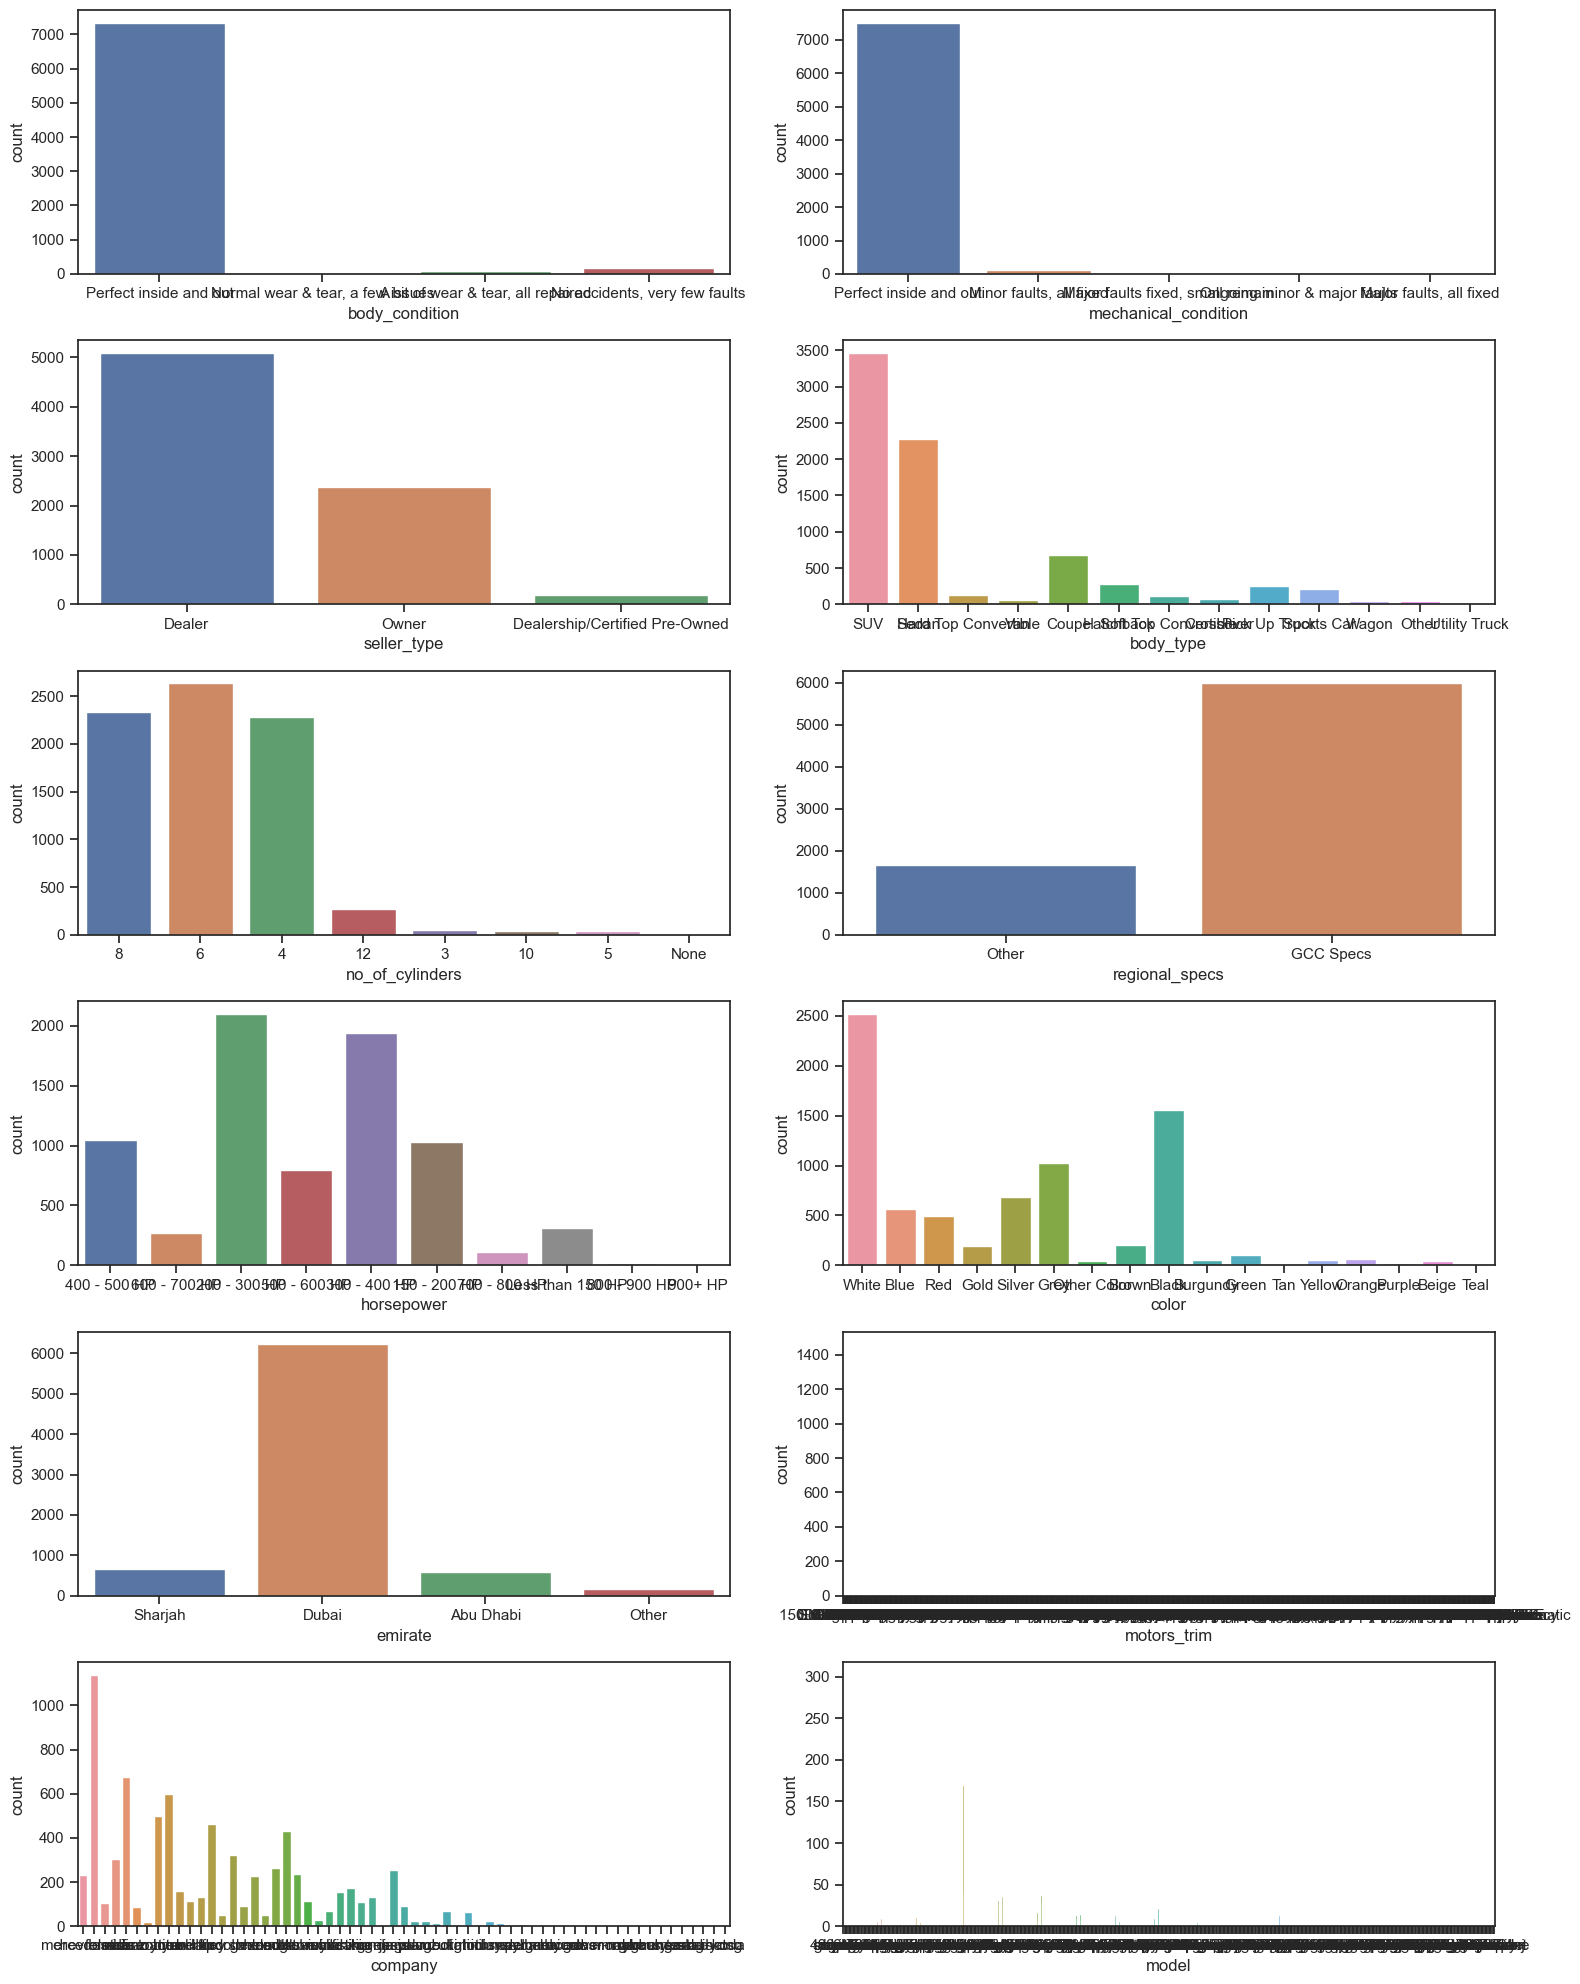

In [29]:
# Let's check the distribution after applying some clean up
cat_features, nbr_features = list_feature_types(df_no_dup)
count_plot(df_no_dup, cat_features)

In [30]:
df_no_dup[['company', 'model', 'motors_trim']].value_counts().shape

(1812,)

In [31]:
df_no_dup['company'].value_counts()

mercedes-benz    1138
nissan            675
bmw               597
toyota            497
ford              463
                 ... 
mercury             1
baic                1
smart               1
saab                1
ssang-yong          1
Name: company, Length: 61, dtype: int64

⚠️ I spent 5 years in Dubai and I had 5 different cars during this period. I also helped a lot of friends to buy/sell their cars on Dubizzle. So I can safe to say that the below mentioned manufacturer are the market dominants:
- mercedes-benz
- nissan
- bmw
- toyota
- ford
- land-rover
- porsche
- audi
- dodge
- jeep
- mitsubishi
- chevrolet
- lexus
- volkswagen
- hyundai
- infiniti

In [32]:
companies_to_filter = ['mercedes-benz', 'nissan', 'bmw', 'toyota', 'ford', 
                       'land-rover', 'porsche', 'audi', 'dodge', 'jeep', 
                       'mitsubishi', 'chevrolet', 'lexus', 'volkswagen', 'hyundai', 'infiniti']
df_comp = df_no_dup[df_no_dup['company'].isin(companies_to_filter)]
df_comp = df_comp.reset_index(drop=True)
df_comp.shape

(6127, 15)

In [33]:
df_comp[['company', 'model', 'motors_trim']].value_counts().shape

(1273,)

⚠️ The 3 main factors that determine the selling price of a car which are its manufacturer, model and engine type. And also, even though tech used for each model and motor trim are almost the same, it's unique for each company. That's why we'll merge these 3 features and make 1 feature instead.

In [34]:
df_car = df_comp.copy()
df_car['car'] = df_car['company'] + '__' + df_comp['model'] + '__' + df_comp['motors_trim']
df_car.drop(['company', 'model', 'motors_trim'], axis=1, inplace=True)
df_car.shape

(6127, 13)

In [35]:
df_car['car'].value_counts().shape

(1273,)

In [36]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_in_aed          6127 non-null   int64  
 1   kilometers            6127 non-null   int64  
 2   body_condition        6127 non-null   object 
 3   mechanical_condition  6127 non-null   object 
 4   seller_type           6127 non-null   object 
 5   body_type             6127 non-null   object 
 6   no_of_cylinders       6127 non-null   object 
 7   regional_specs        6127 non-null   object 
 8   horsepower            6127 non-null   object 
 9   year                  6127 non-null   float64
 10  color                 6127 non-null   object 
 11  emirate               6127 non-null   object 
 12  car                   6127 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 622.4+ KB


<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> <a id='car'></a> This feature has 1273 unique values (categories) which shouldn't be encoded with one-hot-encoding since it'll increase the dimentions of the dataframe enormously. It's better to use either Frequency Encoding or Target Encoding.
    The value count of the most of the categories will be highly likely the same. That's why it's not conveniant to use Frequency Encoding. We should continue with Target Encoding.
</div>
    
> By one-hot encoding them, we create a really sparse matrix and inflate the number of dimensions the model needs to work with, and we may fall victim to the dreaded Curse of Dimensionality [1](https://towardsdatascience.com/dealing-with-categorical-variables-by-using-target-encoder-a0f1733a4c69). 

### Encoding Categorical Features

In [37]:
car_cat_features = ['body_condition', 'mechanical_condition', 'seller_type', 'body_type',
                   'no_of_cylinders', 'regional_specs', 'horsepower', 'color', 'emirate']

df_dummy = pd.get_dummies(df_car[car_cat_features], drop_first=True)
df_dummy.head()

,"body_condition_No accidents, very few faults","body_condition_Normal wear & tear, a few issues",body_condition_Perfect inside and out,"mechanical_condition_Major faults, all fixed","mechanical_condition_Minor faults, all fixed",mechanical_condition_Ongoing minor & major faults,mechanical_condition_Perfect inside and out,seller_type_Dealership/Certified Pre-Owned,seller_type_Owner,body_type_Crossover,...,color_Purple,color_Red,color_Silver,color_Tan,color_Teal,color_White,color_Yellow,emirate_Dubai,emirate_Other,emirate_Sharjah
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_dummy.shape

(6127, 56)

In [39]:
df_car = pd.concat([df_car, df_dummy], axis=1)
df_car.drop(car_cat_features, axis=1, inplace=True)
df_car.shape

(6127, 60)

### Determine the Features and Targets

In [40]:
x = df_car.drop('price_in_aed', axis=1)
y = df_car['price_in_aed']

print('Shape of features: ', x.shape)
print('Shape of target: ', y.shape)

Shape of features:  (6127, 59)
Shape of target:  (6127,)


### Splitting the Dataset

First we'll split the dataset into train and test, then apply data processing not to cause any data leakage.

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print('Train shape:', x_train.shape)
print('Test shape:', x_test.shape)

Train shape: (4901, 59)
Test shape: (1226, 59)


### Remove Outliers

There is one more step to complete the handling categorical features. That's encoding `car` feature using Target Encoding as mentioned [above](#car). However, before moving further with this step, we need to remove the outliers as it has impact on the mean of the target.

|Min||Feature||Max|
|---|-|:-----:|-|---|
|0|<=|price_in_aed|<=|500000|
|0|<=|kilometers|<=|300000|
|2000|<=|year|<=|2020|

❗️ First we need to merge `x_train` and `y_train` to remove the same number of datapoints from the training set.

In [42]:
df_car_train = pd.concat([x_train, y_train.to_frame('price_in_aed')], axis=1)
df_car_train.shape

(4901, 60)

Skewness: 4.8504571172794195
Kurtosis: 36.366868935804845
------------------------------------------


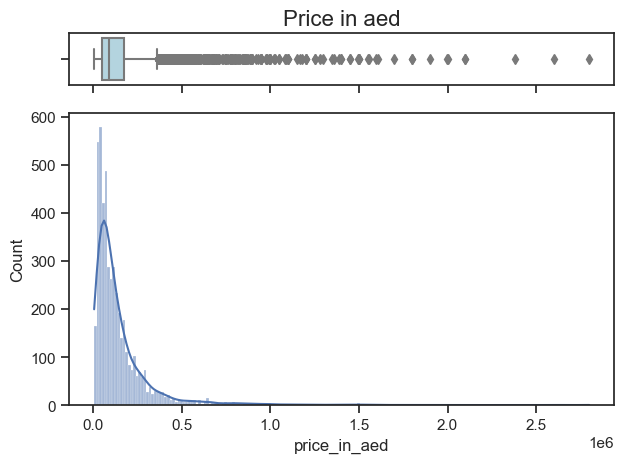

In [43]:
dist_plot(df_car_train, 'price_in_aed')

Skewness: 69.72604524903886
Kurtosis: 4874.653092911077
------------------------------------------


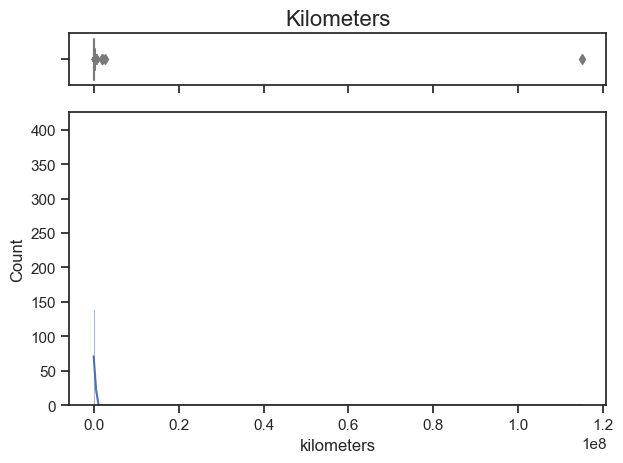

In [44]:
dist_plot(df_car_train, 'kilometers')

Skewness: -2.1317078299617354
Kurtosis: 13.849942369556668
------------------------------------------


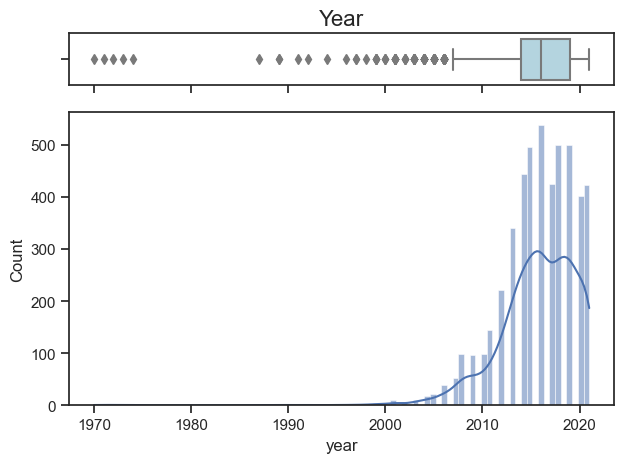

In [46]:
dist_plot(df_car_train, 'year')

In [45]:
df_train_clean = df_car_train[(df_car_train['kilometers'] <= 300000) & 
                 (df_car_train['year'] >= 2000) & (df_car_train['price_in_aed'] <= 500000)]
df_train_clean.shape

(4637, 60)

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> The number of samples didn't impacted a lot.
</div>

In [46]:
x_train = df_train_clean.drop('price_in_aed', axis=1)
y_train = df_train_clean['price_in_aed']

In [47]:
from category_encoders import TargetEncoder

In [48]:
encoder = TargetEncoder()
encoder.fit(x_train['car'], y_train)
x_train['car_encoded'] = encoder.transform(x_train['car'])
x_train.drop('car', axis=1, inplace=True)
x_test['car_encoded'] = encoder.transform(x_test['car'])
x_test.drop('car', axis=1, inplace=True)
x_train.head()

,kilometers,year,"body_condition_No accidents, very few faults","body_condition_Normal wear & tear, a few issues",body_condition_Perfect inside and out,"mechanical_condition_Major faults, all fixed","mechanical_condition_Minor faults, all fixed",mechanical_condition_Ongoing minor & major faults,mechanical_condition_Perfect inside and out,seller_type_Dealership/Certified Pre-Owned,...,color_Red,color_Silver,color_Tan,color_Teal,color_White,color_Yellow,emirate_Dubai,emirate_Other,emirate_Sharjah,car_encoded
5664,195000,2013.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,113425.484443
5703,175000,2013.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,114941.442643
231,129531,2013.0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,117206.933197
3853,275450,2014.0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,120733.890083
4360,150000,2010.0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,89244.097807


### Scaling

In [49]:
x_train[['kilometers', 'year', 'car_encoded']].describe()

,kilometers,year,car_encoded
count,4637.000000,4637.000000,4637.000000
mean,100695.995903,2015.641363,121933.616826
std,63168.500742,3.705003,24992.287220
min,0.000000,2000.000000,58827.809625
25%,50000.000000,2014.000000,107887.528870
50%,95837.000000,2016.000000,114814.237341
75%,145749.000000,2018.000000,130345.474596
max,300000.000000,2021.000000,232348.418326


In [50]:
y_train.describe()

count      4637.000000
mean     119467.386025
std       96449.466186
min        9900.000000
25%       48500.000000
50%       89000.000000
75%      159000.000000
max      500000.000000
Name: price_in_aed, dtype: float64

In [51]:
scaler = StandardScaler()
scaler.fit(x_train[['kilometers', 'year', 'car_encoded']])
x_train[['kilometers', 'year', 'car_encoded']] = scaler.transform(x_train[['kilometers', 'year', 'car_encoded']])

In [52]:
x_test[['kilometers', 'year', 'car_encoded']] = scaler.transform(x_test[['kilometers', 'year', 'car_encoded']])

In [53]:
scaler.fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))

y_test = scaler.transform(y_test.values.reshape(-1,1))

In [54]:
x_train.describe()

,kilometers,year,"body_condition_No accidents, very few faults","body_condition_Normal wear & tear, a few issues",body_condition_Perfect inside and out,"mechanical_condition_Major faults, all fixed","mechanical_condition_Minor faults, all fixed",mechanical_condition_Ongoing minor & major faults,mechanical_condition_Perfect inside and out,seller_type_Dealership/Certified Pre-Owned,...,color_Red,color_Silver,color_Tan,color_Teal,color_White,color_Yellow,emirate_Dubai,emirate_Other,emirate_Sharjah,car_encoded
count,4.637000e+03,4.637000e+03,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.0,4637.000000,4637.000000,...,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4.637000e+03
mean,5.439782e-17,4.096692e-15,0.023722,0.002157,0.960104,0.000216,0.013802,0.0,0.985120,0.022860,...,0.052620,0.091438,0.000431,0.000431,0.356265,0.005176,0.794911,0.022428,0.100280,-5.026052e-16
std,1.000108e+00,1.000108e+00,0.152199,0.046394,0.195737,0.014685,0.116681,0.0,0.121087,0.149472,...,0.223298,0.288263,0.020766,0.020766,0.478946,0.071764,0.403811,0.148088,0.300406,1.000108e+00
min,-1.594257e+00,-4.222142e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.525284e+00
25%,-8.026384e-01,-4.430604e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-5.620775e-01
50%,-7.692948e-02,9.680849e-02,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.848938e-01
75%,7.132964e-01,6.366774e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.366144e-01
max,3.155457e+00,1.446481e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.418432e+00


## Modelling

We'll stick with the suggestion bby Scikit Learn and we'll first evaluate 2 different linear models: Lasso and ElasticNet

| <img src='Images/ml_map.png' width=50% alt='Choosing the right estimator'> |
|:--:| 
| [Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) |

Based on the result we'll decide on the model, then we'll fine tune the hyperparameters.

### Selecting the Algorithm

In [55]:
def evaluate_algorithms(x, y):
    models = []
    models.append(('LS', Lasso()))
    models.append(('EN', ElasticNet(random_state=101)))
    models.append(('SVR', SVR()))
    models.append(('DTR', DecisionTreeRegressor()))
    models.append(('ABR', AdaBoostRegressor()))
    models.append(('RFR', RandomForestRegressor()))
    models.append(('GBR', GradientBoostingRegressor()))
    
    names = []
    results = []
    
    for name, model in models:
        kfold = KFold(n_splits=5, random_state=101, shuffle=True)
        cv_results = cross_val_score(model, x, y, cv=kfold, scoring='r2')
        results.append(cv_results)
        names.append(name)
        msg = '%s - Mean R\u00b2: %.3f STD: %.3f' % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    # Plot the results
    plt.title('Algorithm Comparison', fontsize=16)
    plt.boxplot(results)
    plt.xlabel('Algorithms')
    plt.ylabel('$R^2$ Score')
    plt.xticks(ticks=range(1, len(names)+1), labels=names, fontsize=14)
    plt.show()

LS - Mean R²: -0.001 STD: 0.001
EN - Mean R²: 0.166 STD: 0.007
SVR - Mean R²: 0.865 STD: 0.006
DTR - Mean R²: 0.740 STD: 0.036
ABR - Mean R²: 0.708 STD: 0.020
RFR - Mean R²: 0.866 STD: 0.010
GBR - Mean R²: 0.856 STD: 0.004


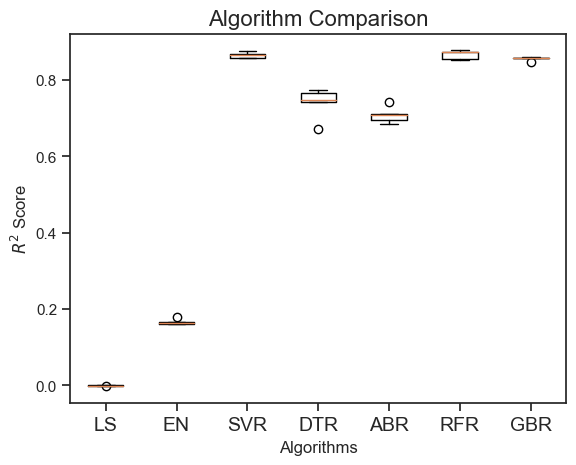


It took 15.08 secs. to evaluate 7 algotrihtms with 5-fold cross validation.


In [56]:
import time as t

start = t.time()
evaluate_algorithms(x_train.values, y_train.ravel())
end = t.time()

print('\nIt took', str(round(end-start, 2)), 'secs. to evaluate 7 algotrihtms with 5-fold cross validation.')

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> 
</div>

### Testing

In [57]:
model = RandomForestRegressor()
model.fit(x_train, y_train.ravel())

y_hat_train = model.predict(x_train)
train_score = r2_score(y_train, y_hat_train)
print('Train R\u00b2:%.3f' % train_score)

y_hat_test = model.predict(x_test)
test_score = r2_score(y_test, y_hat_test)

print('Test R\u00b2:%.3f' % test_score)

Train R²:0.983
Test R²:0.246


<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> 🚨 The model suffers from overfitting <b>a lot</b>. Before moving to the hyperparameter tuning, we must fixt this.<br/><br/>
    We'll eliminate some feauture. Selecting relevant features and removing irrelevant or redundant ones can help simplify the model and reduce overfitting.
</div>

### Feature Selection

[X] Label encoding to df_car

[X] Target encoding to df_car

[X] Scale the numeric features including Target encoded (if necessary)

[X] Mutual information

In [84]:
df_car = df_comp.copy()
df_car['car'] = df_car['company'] + '__' + df_comp['model'] + '__' + df_comp['motors_trim']
df_car.drop(['company', 'model', 'motors_trim'], axis=1, inplace=True)
df_car.shape

(6127, 13)

In [83]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_in_aed          6127 non-null   int64  
 1   kilometers            6127 non-null   int64  
 2   body_condition        6127 non-null   object 
 3   mechanical_condition  6127 non-null   object 
 4   seller_type           6127 non-null   object 
 5   body_type             6127 non-null   object 
 6   no_of_cylinders       6127 non-null   object 
 7   regional_specs        6127 non-null   object 
 8   horsepower            6127 non-null   object 
 9   year                  6127 non-null   float64
 10  color                 6127 non-null   object 
 11  emirate               6127 non-null   object 
 12  car                   6127 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 622.4+ KB


In [62]:
car_cat_features

['body_condition',
 'mechanical_condition',
 'seller_type',
 'body_type',
 'no_of_cylinders',
 'regional_specs',
 'horsepower',
 'color',
 'emirate']

In [85]:
label_encoder = LabelEncoder()
df_car_encoded = pd.DataFrame()
for feature in car_cat_features:
        df_car_encoded[feature] = label_encoder.fit_transform(df_car[feature])
        
df_car_encoded[car_cat_features].head()

,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,emirate
0,3,4,0,6,6,1,3,15,3
1,3,4,0,7,5,0,3,2,3
2,3,4,2,7,5,0,1,5,1
3,3,4,0,11,5,1,1,12,1
4,3,4,0,7,6,0,4,7,0


In [86]:
df_car_encoded['price_in_aed'] = df_car['price_in_aed']
df_car_encoded['kilometers'] = df_car['kilometers']
df_car_encoded['year'] = df_car['year']
df_car_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_condition        6127 non-null   int64  
 1   mechanical_condition  6127 non-null   int64  
 2   seller_type           6127 non-null   int64  
 3   body_type             6127 non-null   int64  
 4   no_of_cylinders       6127 non-null   int64  
 5   regional_specs        6127 non-null   int64  
 6   horsepower            6127 non-null   int64  
 7   color                 6127 non-null   int64  
 8   emirate               6127 non-null   int64  
 9   price_in_aed          6127 non-null   int64  
 10  kilometers            6127 non-null   int64  
 11  year                  6127 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 574.5 KB


In [87]:
target_encoder = TargetEncoder()
df_car_encoded['car_encoded'] = target_encoder.fit_transform(df_car['car'], df_car['price_in_aed'])
df_car_encoded.describe()

,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,emirate,price_in_aed,kilometers,year,car_encoded
count,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6.127000e+03,6.127000e+03,6127.000000,6127.000000
mean,2.909907,3.967684,0.661335,5.787824,4.696915,0.223600,2.137751,8.805941,1.133344,1.517847e+05,1.188681e+05,2015.637833,160880.578537
std,0.459646,0.265432,0.927882,2.111338,1.237683,0.416691,1.864130,5.728318,0.685665,2.105447e+05,1.470288e+06,4.265689,94420.170433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+03,0.000000e+00,1965.000000,54232.917295
25%,3.000000,4.000000,0.000000,6.000000,3.000000,0.000000,1.000000,2.000000,1.000000,4.900000e+04,4.398350e+04,2014.000000,130031.718913
50%,3.000000,4.000000,0.000000,6.000000,5.000000,0.000000,2.000000,11.000000,1.000000,9.200000e+04,9.220000e+04,2016.000000,139119.531163
75%,3.000000,4.000000,2.000000,7.000000,6.000000,0.000000,3.000000,15.000000,1.000000,1.730000e+05,1.440150e+05,2019.000000,156710.382643
max,3.000000,4.000000,2.000000,12.000000,6.000000,1.000000,9.000000,16.000000,3.000000,4.999000e+06,1.150000e+08,2021.000000,781903.347416


In [88]:
scaler = StandardScaler()
df_car_encoded[['kilometers', 'year', 'car_encoded']] = scaler.fit_transform(df_car_encoded[['kilometers', 'year', 'car_encoded']])
df_car_encoded.describe()

,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,emirate,price_in_aed,kilometers,year,car_encoded
count,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6.127000e+03,6.127000e+03,6.127000e+03,6.127000e+03
mean,2.909907,3.967684,0.661335,5.787824,4.696915,0.223600,2.137751,8.805941,1.133344,1.517847e+05,-1.159691e-18,3.346869e-15,-1.623568e-17
std,0.459646,0.265432,0.927882,2.111338,1.237683,0.416691,1.864130,5.728318,0.685665,2.105447e+05,1.000082e+00,1.000082e+00,1.000082e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+03,-8.085339e-02,-1.187193e+01,-1.129593e+00
25%,3.000000,4.000000,0.000000,6.000000,3.000000,0.000000,1.000000,2.000000,1.000000,4.900000e+04,-5.093606e-02,-3.839863e-01,-3.267456e-01
50%,3.000000,4.000000,0.000000,6.000000,5.000000,0.000000,2.000000,11.000000,1.000000,9.200000e+04,-1.813948e-02,8.490937e-02,-2.304891e-01
75%,3.000000,4.000000,2.000000,7.000000,6.000000,0.000000,3.000000,15.000000,1.000000,1.730000e+05,1.710478e-02,7.882528e-01,-4.416997e-02
max,3.000000,4.000000,2.000000,12.000000,6.000000,1.000000,9.000000,16.000000,3.000000,4.999000e+06,7.814148e+01,1.257148e+00,6.577762e+00


In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

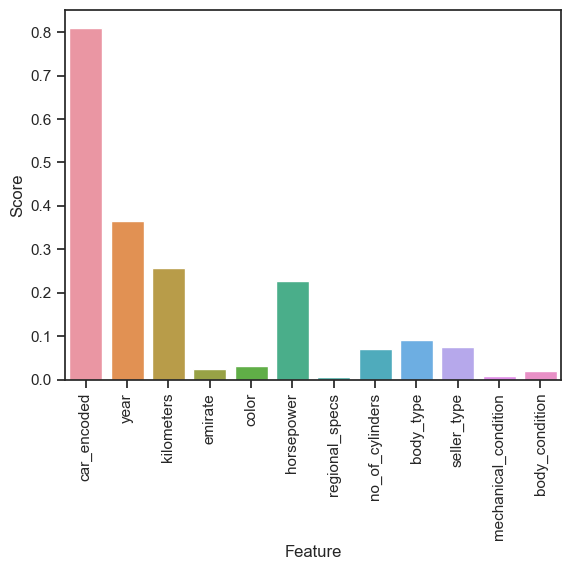

In [90]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(df_car_encoded.drop('price_in_aed', axis=1), df_car_encoded['price_in_aed'])
features = fs.transform(df_car_encoded.drop('price_in_aed', axis=1))
df_mutual_info = pd.DataFrame(columns=['Feature', 'Score'])

for i in range(len(fs.scores_)):
    new_row = pd.DataFrame({'Feature': df_car_encoded.drop('price_in_aed', axis=1).columns[i], 'Score': fs.scores_[i]}, index=[0])
    df_mutual_info = pd.concat([new_row, df_mutual_info], axis=0, ignore_index=True)
    
sb.barplot(data=df_mutual_info, x='Feature', y='Score')
plt.xticks(rotation=90)
plt.show()

In [91]:
df_mutual_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  12 non-null     object 
 1   Score    12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


In [92]:
df_mutual_info.sort_values(by=['Score'], ascending=False).head(10)

,Feature,Score
0,car_encoded,0.810600
1,year,0.364903
2,kilometers,0.257798
5,horsepower,0.227496
8,body_type,0.090260
9,seller_type,0.075857
7,no_of_cylinders,0.069747
4,color,0.030684
3,emirate,0.023911
11,body_condition,0.018429


In [93]:
from sklearn.feature_selection import f_regression

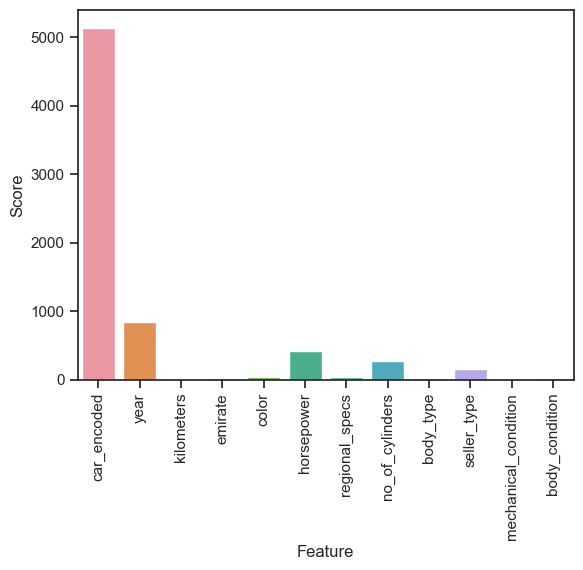

In [96]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(df_car_encoded.drop('price_in_aed', axis=1), df_car_encoded['price_in_aed'])
features_freg = fs.transform(df_car_encoded.drop('price_in_aed', axis=1))
df_freg_info = pd.DataFrame(columns=['Feature', 'Score'])

for i in range(len(fs.scores_)):
    new_row = pd.DataFrame({'Feature': df_car_encoded.drop('price_in_aed', axis=1).columns[i], 'Score': fs.scores_[i]}, index=[0])
    df_freg_info = pd.concat([new_row, df_freg_info], axis=0, ignore_index=True)
    
sb.barplot(data=df_freg_info, x='Feature', y='Score')
plt.xticks(rotation=90)
plt.show()

In [98]:
df_freg_info.sort_values(by=['Score'], ascending=False).head(10)

,Feature,Score
0,car_encoded,5140.287870
1,year,842.502802
5,horsepower,423.096809
7,no_of_cylinders,267.819038
9,seller_type,151.449663
6,regional_specs,35.892963
4,color,29.695285
8,body_type,28.213685
11,body_condition,24.689409
3,emirate,19.255561


<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> the top 5 features of <code>mutual_info_regression</code> and <code>f_regression</code> methods are different. That's why we'll give them both a chance and compare how accurate results these features subsets will produce.
</div>

In [118]:
# Starting the row number from 1 as df_car doesn't have car_encoded feature.
# Target encoding will be done after splitting the dataframes with new feature sets into train and test
# car feature feature will be added to the arrays to be encoded later
freg_features = df_freg_info.sort_values(by=['Score'], ascending=False).iloc[1:5, 0].values
freg_features = np.append(freg_features, 'car')
print('f_Regression Features: ', freg_features)
mutual_features = df_mutual_info.sort_values(by=['Score'], ascending=False).iloc[1:5, 0].values
mutual_features = np.append(mutual_features, 'car')
print('Mutual Infor Regression Features:', mutual_features)

f_Regression Features:  ['year' 'horsepower' 'no_of_cylinders' 'seller_type' 'car']
Mutual Infor Regression Features: ['year' 'kilometers' 'horsepower' 'body_type' 'car']


In [119]:
df_freg = df_car[freg_features].copy()
df_freg['price_in_aed'] = df_car['price_in_aed']
df_freg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             6127 non-null   float64
 1   horsepower       6127 non-null   object 
 2   no_of_cylinders  6127 non-null   object 
 3   seller_type      6127 non-null   object 
 4   car              6127 non-null   object 
 5   price_in_aed     6127 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 287.3+ KB


In [120]:
df_mutual = df_car[mutual_features].copy()
df_mutual['price_in_aed'] = df_car['price_in_aed']
df_mutual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6127 non-null   float64
 1   kilometers    6127 non-null   int64  
 2   horsepower    6127 non-null   object 
 3   body_type     6127 non-null   object 
 4   car           6127 non-null   object 
 5   price_in_aed  6127 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 287.3+ KB
